<a href="https://colab.research.google.com/github/JoumanaMaki/Autoencoders-for-image-compression/blob/main/Autoencoders_for_image_compression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders for image compression - Part 2


## Importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, AveragePooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.17.0'

## load the images

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

## Visualize the images

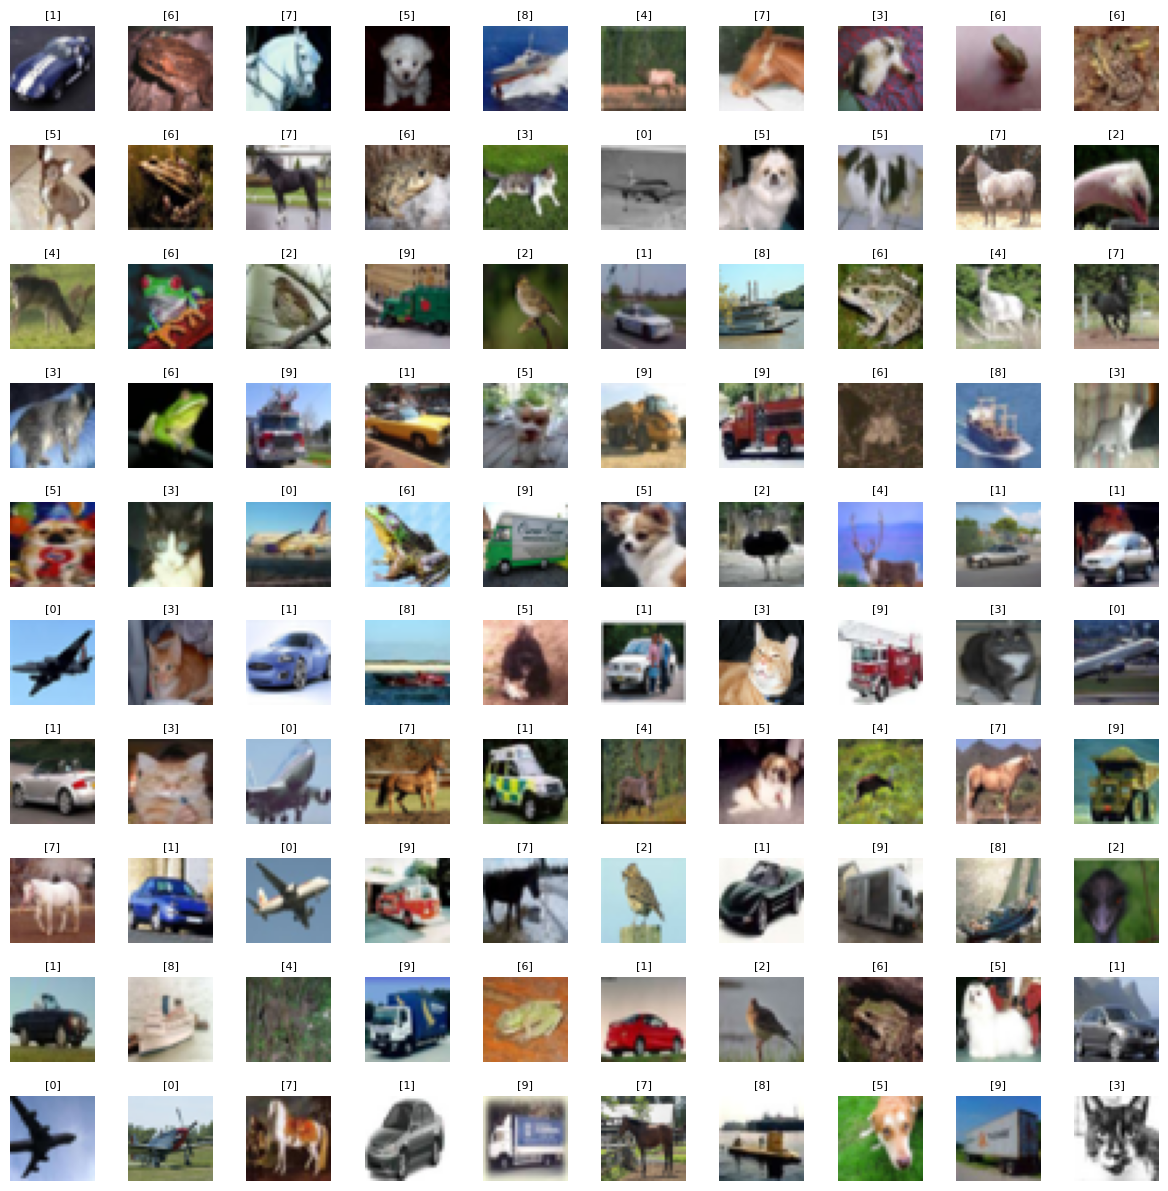

In [9]:
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 50000)
    axes[i].imshow(x_train[index], cmap = 'gray' )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4);

## Pre-processing the images

In [10]:
x_train = x_train/255
x_test = x_test/25

In [12]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [13]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Build and train the convolutional autoencoder

In [14]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same")) # Encoded image no data flattening

# Decoder
autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(3, (3,3), activation='sigmoid', padding="same"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 8, 8, 32)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 52,963 (206.89 KB)

 Trainable params: 52,515 (205.14 KB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 383s 245ms/step - accuracy: 0.6433 - loss: 0.5812
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 416s 228ms/step - accuracy: 0.7231 - loss: 0.5680
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 349s 223ms/step - accuracy: 0.7408 - loss: 0.5648
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 387s 226ms/step - accuracy: 0.7490 - loss: 0.5635
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 381s 226ms/step - accuracy: 0.7555 - loss: 0.5619


## Encoding and decoding the test images

In [21]:
autoencoder.inputs

[<KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=None, name=keras_tensor>]

In [22]:
encoder = Model(inputs=autoencoder.inputs, outputs=autoencoder.get_layer('average_pooling2d_2').output)
encoder.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 8, 8, 32)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,328 (98.94 KB)

 Trainable params: 25,104 (98.06 KB)

 Non-trainable params: 224 (896.00 B)

In [23]:
coded_test_images = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [24]:
coded_test_images

array([[[[ 8.02155991e+01,  6.01791115e+01,  4.80029411e+01, ...,
           3.76286201e+01,  4.56425133e+01,  7.86930237e+01],
         [ 9.50975189e+01,  5.88991089e+01,  7.28045502e+01, ...,
           4.32569923e+01,  5.51425552e+01,  8.27360916e+01],
         [ 8.16129303e+01,  4.62252274e+01,  6.51670837e+01, ...,
           4.30869179e+01,  5.03712921e+01,  7.61202469e+01],
         [ 6.20054359e+01,  2.98756733e+01,  5.50644379e+01, ...,
           2.78431301e+01,  3.15423489e+01,  4.13838882e+01]],

        [[ 1.13233521e+02,  6.80248642e+01,  5.88623199e+01, ...,
           6.43786774e+01,  7.58424377e+01,  1.10784935e+02],
         [ 1.29498840e+02,  7.33020325e+01,  1.10555450e+02, ...,
           7.34990082e+01,  7.74684525e+01,  1.17599091e+02],
         [ 1.00113525e+02,  6.15341873e+01,  8.11705551e+01, ...,
           5.64893799e+01,  7.57586975e+01,  9.54875336e+01],
         [ 5.45445518e+01,  3.74067841e+01,  6.83881912e+01, ...,
           3.56632004e+01,  3.764514

In [25]:
coded_test_images.shape

(10000, 4, 4, 16)

In [26]:
coded_test_images[0]

array([[[ 80.2156    ,  60.17911   ,  48.00294   ,  43.11528   ,
          31.952908  ,  52.04957   ,   8.632047  ,  44.548607  ,
          54.529427  ,  44.525745  ,  40.983192  ,  23.400612  ,
           3.3603396 ,  37.62862   ,  45.642513  ,  78.69302   ],
        [ 95.09752   ,  58.89911   ,  72.80455   ,  44.29525   ,
          25.673164  ,  95.89553   ,  13.431493  ,  62.63363   ,
          75.18358   ,  51.71669   ,  46.588646  ,   9.297196  ,
          -0.21032763,  43.256992  ,  55.142555  ,  82.73609   ],
        [ 81.61293   ,  46.225227  ,  65.16708   ,  36.452606  ,
          27.328678  ,  76.67503   ,   8.068859  ,  44.25306   ,
          62.804123  ,  51.9108    ,  43.600357  ,   7.708279  ,
          -0.49309444,  43.086918  ,  50.371292  ,  76.12025   ],
        [ 62.005436  ,  29.875673  ,  55.064438  ,  16.477175  ,
          19.682598  ,  65.84778   ,  13.235262  ,  34.191666  ,
          43.132225  ,  29.58467   ,  31.505032  ,   2.4215422 ,
          -2.0623333 ,

In [27]:
decoded_test_images = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step


In [28]:
decoded_test_images.shape

(10000, 32, 32, 3)

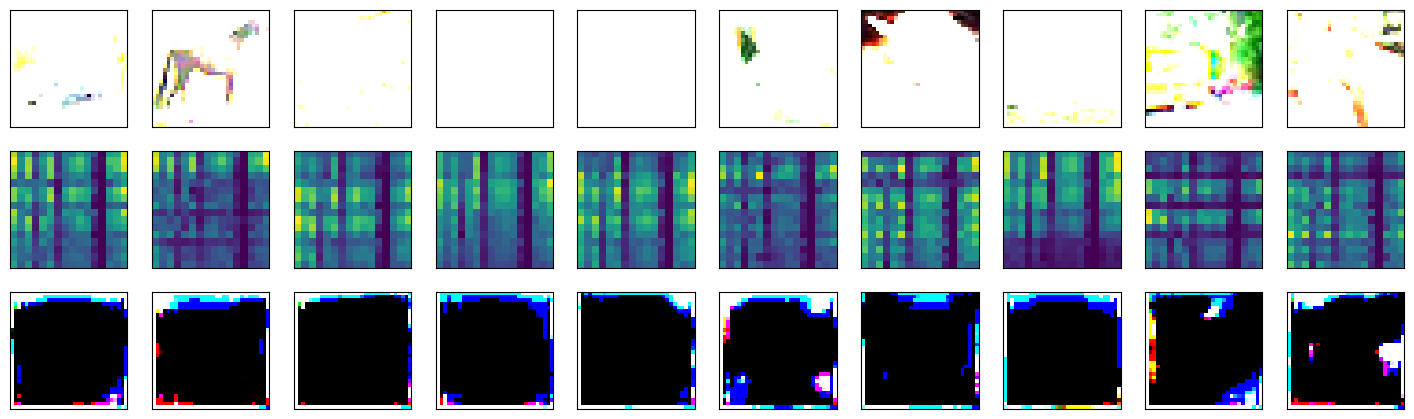

In [34]:
n_images = 10
test_images = np.random.randint(0, x_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(x_test[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())
  # EnCoded image
  ax = plt.subplot(10,10,i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,16))
  plt.xticks(())
  plt.yticks(())
  # DeCoded image
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())